In [0]:
import numpy as np
import pandas as pd
import io

In [0]:
from pandas import DataFrame
from fbprophet import Prophet

In [9]:
from google.colab import files
uploaded = files.upload()

Saving fassion1.csv to fassion1 (1).csv


In [10]:
fashion = pd.read_csv(io.StringIO(uploaded['fassion1.csv'].decode('utf-8')))
fashion.head()

,SESS_DT,PD_BUY_CT,CLAC0_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,20180401,1,패션의류,여성의류,여성의류하의,여성바지
1,20180401,1,패션의류,패션잡화,여성지갑,여성일반지갑
2,20180401,1,패션의류,패션잡화,여성지갑,여성일반지갑
3,20180401,1,패션의류,패션잡화,여성화,여성스니커즈
4,20180401,1,패션의류,패션잡화,보석,팔찌


In [0]:
fashion['SESS_DT'] = pd.to_datetime(fashion['SESS_DT'], format="%Y%m%d")

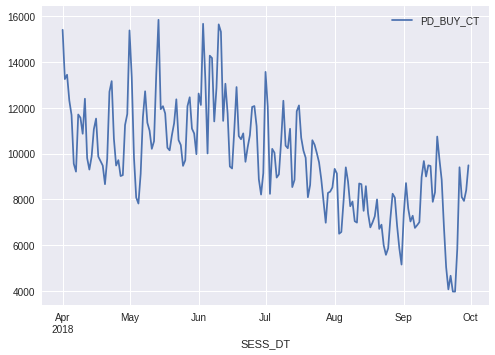

In [14]:
total_cnt = DataFrame(fashion.groupby('SESS_DT').sum())
p = total_cnt.plot()

In [19]:
df = pd.DataFrame({'ds':total_cnt.index, 'y':total_cnt['PD_BUY_CT']})
df.reset_index(inplace=True)
df = df.drop(['SESS_DT'], axis=1)
df.head()

,ds,y
0,2018-04-01,15400
1,2018-04-02,13249
2,2018-04-03,13439
3,2018-04-04,12316
4,2018-04-05,11681


In [20]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=30) # make_future_dataframe를 통해 기간 설정
forecast = m.predict(future) # predict를 통해 예측 진행

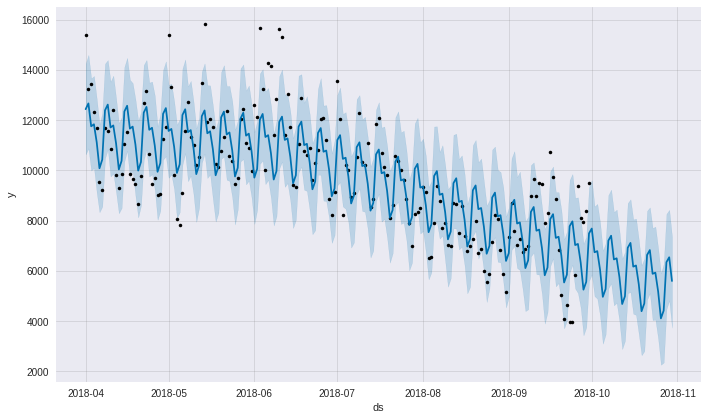

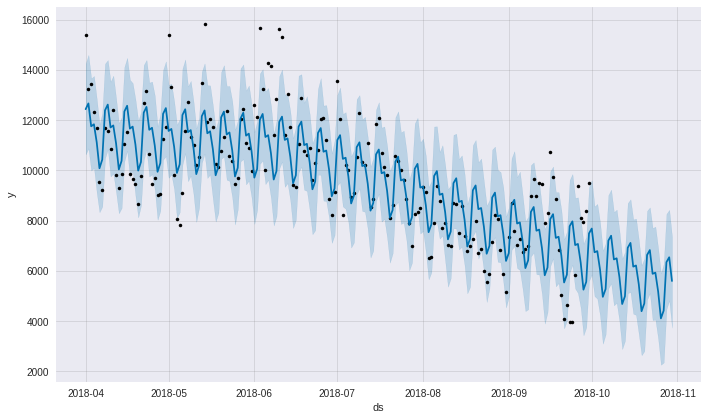

In [24]:
m.plot(forecast)

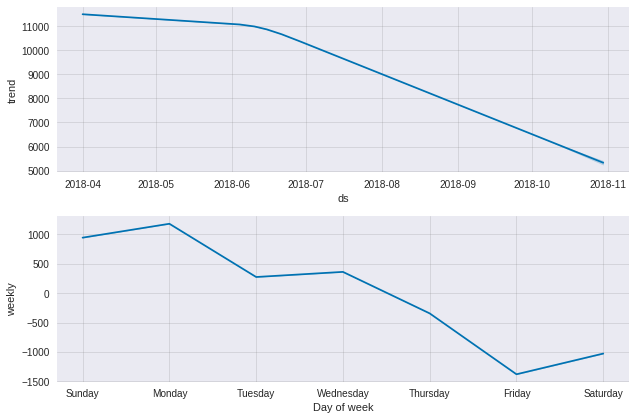

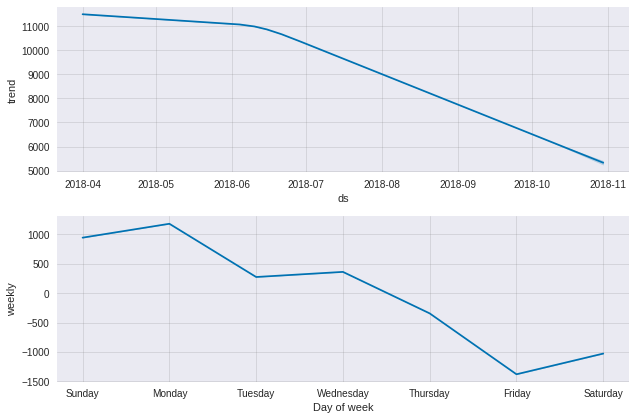

In [25]:
m.plot_components(forecast) # 큰 틀에서의 트랜드와 최근 트랜드 파악 가능

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ValueError: ignored

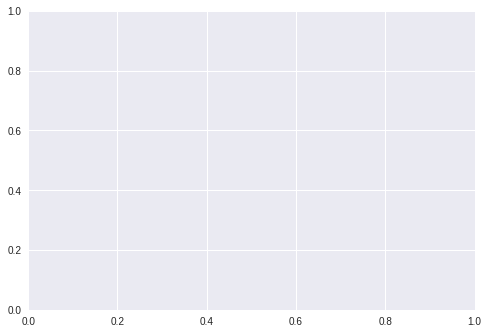

In [26]:

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        a = dataset[i:(i + 1)]
        dataX.append(a)
        dataY.append(dataset[i + 1])
    return np.array(dataX), np.array(dataY)
 
 
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
 
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
 
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)
 
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측
 
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [49]:
df2 = pd.DataFrame({'n':range(len(total_cnt)), 'y':total_cnt['PD_BUY_CT']})
df2.reset_index(inplace=True)
df2 = df2.drop(['SESS_DT'], axis=1)
df2.head()

,n,y
0,0,15400
1,1,13249
2,2,13439
3,3,12316
4,4,11681


In [50]:
nparr = df2.values
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        a = dataset[i:(i + 1)]
        dataX.append(a)
        dataY.append(dataset[i + 1])
    return np.array(dataX), np.array(dataY)

In [54]:
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))

164 19


In [55]:
train.head()

AttributeError: ignored